# K Nearest Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../FeatureEngineering/MetaData/data6_&_odds.csv')
df.dropna(inplace=True)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = df.loc[(df.season <= 2013) & (df.season >= 2007)]
valid_data = df.loc[(df.season > 2013) & (df.season < 2016)]
test_data = df.loc[df.season >= 2016]
full_train_data = pd.concat([train_data, valid_data], axis=0)

X_train, y_train = train_data.drop(columns=["game_date_est","season","game_id","home_team","visitor_team","home_team_id","visitor_team_id","home_team_wins","conference","conference_visitor"]), train_data.home_team_wins
X_val, y_val = valid_data.drop(columns=["game_date_est","season","game_id","home_team","visitor_team","home_team_id","visitor_team_id","home_team_wins","conference","conference_visitor"]), valid_data.home_team_wins
X_test, y_test = test_data.drop(columns=["game_date_est","season","game_id","home_team","visitor_team","home_team_id","visitor_team_id","home_team_wins","conference","conference_visitor"]), test_data.home_team_wins


## KNN with GridSearchCV and PCA

In [4]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
trainPCA = pca.fit_transform(X_train)
valPCA = pca.transform(X_val)

In [5]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(trainPCA, y_train)
val_score = estimator.score(X_val, y_val)

preds = estimator.predict(valPCA)
test_score = estimator.score(valPCA, y_val)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)



Συνολικός χρόνος fit και predict: 41.9981951713562 seconds
              precision    recall  f1-score   support

   home_loss       0.62      0.52      0.57      1011
    home_win       0.69      0.77      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.65      2420
weighted avg       0.66      0.67      0.66      2420

val score: 0.4177685950413223
KNeighborsClassifier(leaf_size=1, n_neighbors=13)
{'leaf_size': 1, 'n_neighbors': 13}
best score: 0.6585507246376812
test score 0.6677685950413224


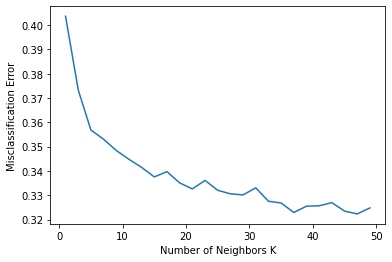

In [6]:
import matplotlib.pyplot as plt


# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1, 50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, trainPCA, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [22]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(trainPCA, y_train)
pred = knn.predict(valPCA)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.7020661157024793 with k= 49


## Use of StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_val_standard = scaler.transform(X_val)
X_test_standard = scaler.transform(X_test)

In [9]:
import time

# Split Data to Train and Validation
# X_train, X_val, y_train, y_val = train_test_split(X_train_standard, y_train, test_size=0.4)
clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_standard, y_train)
val_score = estimator.score(X_val_standard, y_val)

preds = estimator.predict(X_val_standard)
test_score = estimator.score(X_val_standard, y_val)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)



Συνολικός χρόνος fit και predict: 41.832741022109985 seconds
              precision    recall  f1-score   support

   home_loss       0.58      0.60      0.59      1011
    home_win       0.71      0.69      0.70      1409

    accuracy                           0.65      2420
   macro avg       0.65      0.65      0.65      2420
weighted avg       0.66      0.65      0.65      2420

val score: 0.6541322314049587
KNeighborsClassifier(leaf_size=1, n_neighbors=14)
{'leaf_size': 1, 'n_neighbors': 14}
best score: 0.6553623188405797
test score 0.6541322314049587


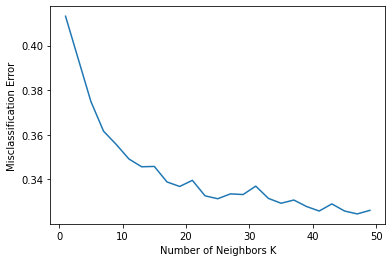

In [10]:
import matplotlib.pyplot as plt


# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1, 50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_standard, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [11]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_standard, y_train)
pred = knn.predict(X_val_standard)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 47

Optimal accuracy on the test set is 0.6925619834710743 with k= 47


## Use of MinMax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Scaling features
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)


In [15]:
import time

# Split Data to Train and Validation
# X_train, X_val, y_train, y_val = train_test_split(X_train_minmax, y_train, test_size=0.4)
clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_minmax, y_train)
val_score = estimator.score(X_val_minmax, y_val)

preds = estimator.predict(X_val_minmax)
# test_score = estimator.score(X_test_minmax, y_test)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
# print("test score", test_score)



Συνολικός χρόνος fit και predict: 38.5172975063324 seconds
              precision    recall  f1-score   support

   home_loss       0.59      0.50      0.54      1011
    home_win       0.68      0.75      0.71      1409

    accuracy                           0.65      2420
   macro avg       0.64      0.63      0.63      2420
weighted avg       0.64      0.65      0.64      2420

val score: 0.6475206611570248
KNeighborsClassifier(leaf_size=1, n_neighbors=11)
{'leaf_size': 1, 'n_neighbors': 11}
best score: 0.6571014492753623


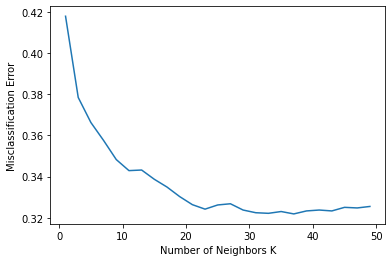

In [16]:
import matplotlib.pyplot as plt


# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1, 50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_minmax, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [18]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_minmax, y_train)
pred = knn.predict(X_val_minmax)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 37

Optimal accuracy on the test set is 0.6723140495867769 with k= 37


## Univariate Feature Selection

In [19]:
X_train_uni = train_data[['diff_curr_win_pct','diff_curr_away_record','odds_home','odds_away','elo_diff']]
y_train_uni = y_train

X_val_uni = valid_data[['diff_curr_win_pct','diff_curr_away_record','odds_home','odds_away','elo_diff']]
y_val_uni = y_val

In [20]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_uni, y_train_uni)
val_score = estimator.score(X_val_uni, y_val_uni)

preds = estimator.predict(X_val_uni)
test_score = estimator.score(X_val_uni, y_val_uni)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_uni, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 9.531769514083862 seconds
              precision    recall  f1-score   support

   home_loss       0.61      0.54      0.57      1011
    home_win       0.70      0.76      0.72      1409

    accuracy                           0.67      2420
   macro avg       0.65      0.65      0.65      2420
weighted avg       0.66      0.67      0.66      2420

val score: 0.665702479338843
KNeighborsClassifier(leaf_size=1, n_neighbors=13)
{'leaf_size': 1, 'n_neighbors': 13}
best score: 0.6685507246376811
test score 0.665702479338843


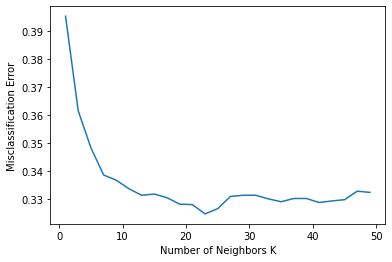

In [21]:
import matplotlib.pyplot as plt


# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1, 50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_uni, y_train_uni, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [22]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_uni, y_train_uni)
pred = knn.predict(X_val_uni)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_uni, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 23

Optimal accuracy on the test set is 0.671900826446281 with k= 23


## kNN with ExtraTress Classifier

In [23]:
X_train_extra = train_data[['odds_home', 'odds_away', 'home_elo', 'visitor_elo', 'elo_diff',
                    'eff_diff', 'eff_visitor', 'top_player_diff', 'diff_win_pct_prev_season',
                    'diff_home_record_last_season', 'ROAD_RECORD_home',
                    'diff_road_record_last_season', 'diff_win_pct_7_last_games', 'W_PCT_home',
                    'W_PCT_away', 'W_PCT_prev_away', 'diff_curr_away_record', 'HOME_RECORD_home', 'diff_curr_home_record',
                    'diff_curr_win_pct']]
y_train_extra = y_train

X_val_extra = valid_data[['odds_home', 'odds_away', 'home_elo', 'visitor_elo', 'elo_diff',
                    'eff_diff', 'eff_visitor', 'top_player_diff', 'diff_win_pct_prev_season',
                    'diff_home_record_last_season', 'ROAD_RECORD_home',
                    'diff_road_record_last_season', 'diff_win_pct_7_last_games', 'W_PCT_home',
                    'W_PCT_away', 'W_PCT_prev_away', 'diff_curr_away_record', 'HOME_RECORD_home', 'diff_curr_home_record',
                    'diff_curr_win_pct']]
y_val_extra = y_val

In [24]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_extra, y_train_extra)
val_score = estimator.score(X_val_extra, y_val_extra)

preds = estimator.predict(X_val_extra)
test_score = estimator.score(X_val_extra, y_val_extra)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_extra, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 36.29199934005737 seconds
              precision    recall  f1-score   support

   home_loss       0.63      0.53      0.58      1011
    home_win       0.70      0.77      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.66      2420
weighted avg       0.67      0.67      0.67      2420

val score: 0.6727272727272727
KNeighborsClassifier(leaf_size=1, n_neighbors=13)
{'leaf_size': 1, 'n_neighbors': 13}
best score: 0.6565217391304347
test score 0.6727272727272727


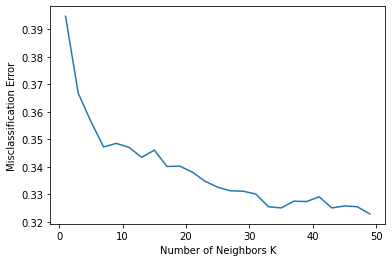

In [25]:
import matplotlib.pyplot as plt


# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1, 50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_extra, y_train_extra, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [26]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_extra, y_train_extra)
pred = knn.predict(X_val_extra)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_extra, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.6921487603305785 with k= 49


## kNN with SelectFromModel(LassoCV)

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

In [28]:
pipe_model = Pipeline([
  ('feature_selection', SelectFromModel(LassoCV())),
  ('classification', KNeighborsClassifier(leaf_size=1, n_neighbors=13))
])
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LassoCV())),
                ('classification',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=13))])

In [29]:
# Predict
preds = pipe_model.predict(X_val)
test_score = pipe_model.score(X_val, y_val)

target_names=['home loss', 'home win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val, preds, target_names=target_names))

print("test score", test_score)


Συνολικός χρόνος fit και predict: 437.4017581939697 seconds
              precision    recall  f1-score   support

   home loss       0.63      0.53      0.58      1011
    home win       0.70      0.78      0.74      1409

    accuracy                           0.68      2420
   macro avg       0.67      0.65      0.66      2420
weighted avg       0.67      0.68      0.67      2420

test score 0.675206611570248


#### Use lasso_data

In [30]:
X_train_sfm = train_data[['elo_diff', 'odds_away', 'odds_home', 'eff_diff', 'eff_visitor',
              'missing_players', 'top_players', 'FT_PCT_home_7g', 'diff_avg_reb_away',
              'home_elo']]
y_train_sfm = y_train

X_val_sfm = valid_data[['elo_diff', 'odds_away', 'odds_home', 'eff_diff', 'eff_visitor',
              'missing_players', 'top_players', 'FT_PCT_home_7g', 'diff_avg_reb_away',
              'home_elo']]
y_val_sfm = y_val

In [31]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_sfm, y_train_sfm)
val_score = estimator.score(X_val_sfm, y_val_sfm)

preds = estimator.predict(X_val_sfm)
test_score = estimator.score(X_val_sfm, y_val_sfm)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_sfm, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 11.302307367324829 seconds
              precision    recall  f1-score   support

   home_loss       0.62      0.53      0.57      1011
    home_win       0.69      0.77      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.65      2420
weighted avg       0.67      0.67      0.66      2420

val score: 0.6698347107438016
KNeighborsClassifier(leaf_size=1, n_neighbors=11)
{'leaf_size': 1, 'n_neighbors': 11}
best score: 0.6534782608695653
test score 0.6698347107438016


In [32]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_sfm, y_train_sfm)
pred = knn.predict(X_val_sfm)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_sfm, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.6847107438016529 with k= 49


## kNN with Sequential Feature Selection

### Forward

In [33]:
X_train_for_sfs = train_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'HOME_RECORD_home',
                    'W_PCT_away', 'W_PCT_prev_home', 'ROAD_RECORD_prev_home', 'W_PCT_prev_away',
                    'HOME_RECORD_prev_away', 'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g',
                    'FT_PCT_home_3g', 'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'WIN_PRCT_home_7g',
                    'FT_PCT_away_7g', 'REB_away_7g', 'diff_avg_ast_home', 'diff_avg_ast_away',
                    'diff_avg_fg3_pct_home', 'diff_avg_fg_pct_away', 'diff_avg_reb_away',
                    'top_players', 'eff', 'eff_visitor', 'G_7days', 'back2back',
                    'HG_7days_VISITOR', 'AG_7days_VISITOR', 'G_7days_VISITOR',
                    'back2back_visitor', 'missing_players', 'missing_players_visitor',
                    'home_elo', 'elo_diff', 'missing_player_diff', 'eff_diff',
                    'Home_Last_5_Avg_FG3_PCT_home', 'Home_Last_5_Avg_FG3_PCT_away',
                    'Away_Last_5_Avg_FG3_PCT_home', 'Away_Last_5_Avg_FT_PCT_away',
                    'diff_fg_pct_last_3_games', 'diff_fg3_pct_last_7_games',
                    'diff_ft_pct_last_3_games', 'diff_ast_last_3_games',
                    'diff_ast_last_7_games', 'diff_win_pct_prev_season',
                    'diff_home_record_last_season', 'diff_road_record_last_season',
                    'diff_curr_win_pct']]

y_train_for_sfs = y_train

X_val_for_sfs = valid_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'HOME_RECORD_home',
                    'W_PCT_away', 'W_PCT_prev_home', 'ROAD_RECORD_prev_home', 'W_PCT_prev_away',
                    'HOME_RECORD_prev_away', 'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g',
                    'FT_PCT_home_3g', 'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'WIN_PRCT_home_7g',
                    'FT_PCT_away_7g', 'REB_away_7g', 'diff_avg_ast_home', 'diff_avg_ast_away',
                    'diff_avg_fg3_pct_home', 'diff_avg_fg_pct_away', 'diff_avg_reb_away',
                    'top_players', 'eff', 'eff_visitor', 'G_7days', 'back2back',
                    'HG_7days_VISITOR', 'AG_7days_VISITOR', 'G_7days_VISITOR',
                    'back2back_visitor', 'missing_players', 'missing_players_visitor',
                    'home_elo', 'elo_diff', 'missing_player_diff', 'eff_diff',
                    'Home_Last_5_Avg_FG3_PCT_home', 'Home_Last_5_Avg_FG3_PCT_away',
                    'Away_Last_5_Avg_FG3_PCT_home', 'Away_Last_5_Avg_FT_PCT_away',
                    'diff_fg_pct_last_3_games', 'diff_fg3_pct_last_7_games',
                    'diff_ft_pct_last_3_games', 'diff_ast_last_3_games',
                    'diff_ast_last_7_games', 'diff_win_pct_prev_season',
                    'diff_home_record_last_season', 'diff_road_record_last_season',
                    'diff_curr_win_pct']]

y_val_for_sfs = y_val


In [34]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_for_sfs, y_train_for_sfs)
val_score = estimator.score(X_val_for_sfs, y_val_for_sfs)

preds = estimator.predict(X_val_for_sfs)
test_score = estimator.score(X_val_for_sfs, y_val_for_sfs)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_for_sfs, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 37.01522445678711 seconds
              precision    recall  f1-score   support

   home_loss       0.62      0.52      0.57      1011
    home_win       0.69      0.77      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.65      2420
weighted avg       0.66      0.67      0.66      2420

val score: 0.6661157024793388
KNeighborsClassifier(leaf_size=1, n_neighbors=13)
{'leaf_size': 1, 'n_neighbors': 13}
best score: 0.6571014492753623
test score 0.6661157024793388


In [35]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_for_sfs, y_train_for_sfs)
pred = knn.predict(X_val_for_sfs)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_for_sfs, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.6851239669421487 with k= 49


### Backwards

In [36]:
X_train_back_sfs = train_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'HOME_RECORD_home',
                     'W_PCT_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
                     'ROAD_RECORD_prev_away', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'PTS_away_3g',
                     'FG_PCT_away_3g', 'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'PTS_home_7g',
                     'FG_PCT_home_7g', 'AST_home_7g', 'AST_away_7g', 'REB_away_7g',
                     'diff_avg_pts_away', 'diff_avg_ast_home', 'diff_avg_ast_away',
                     'diff_avg_fg3_pct_home', 'top_players', 'top_players_visitor', 'eff_visitor',
                     'G_7days', 'back2back', 'HG_7days_VISITOR', 'AG_7days_VISITOR',
                     'G_7days_VISITOR', 'back2back_visitor', 'home_elo', 'elo_diff',
                     'missing_player_diff', 'eff_diff', 'Home_Last_5_Avg_AST_home',
                     'Home_Last_5_Avg_REB_home', 'Home_Last_5_Avg_REB_away',
                     'Home_Last_5_Avg_FG3_PCT_away', 'Away_Last_5_Avg_PTS_home',
                     'Away_Last_5_Avg_FG3_PCT_home', 'Away_Last_5_Avg_AST_home',
                     'Away_Last_5_Avg_FT_PCT_away', 'diff_fg3_pct_last_3_games',
                     'diff_fg3_pct_last_7_games', 'diff_ft_pct_last_3_games',
                     'diff_ast_last_7_games', 'diff_reb_last_3_games',
                     'diff_win_pct_3_last_games']]

y_train_back_sfs = y_train

X_val_back_sfs = valid_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'HOME_RECORD_home',
                     'W_PCT_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
                     'ROAD_RECORD_prev_away', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'PTS_away_3g',
                     'FG_PCT_away_3g', 'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'PTS_home_7g',
                     'FG_PCT_home_7g', 'AST_home_7g', 'AST_away_7g', 'REB_away_7g',
                     'diff_avg_pts_away', 'diff_avg_ast_home', 'diff_avg_ast_away',
                     'diff_avg_fg3_pct_home', 'top_players', 'top_players_visitor', 'eff_visitor',
                     'G_7days', 'back2back', 'HG_7days_VISITOR', 'AG_7days_VISITOR',
                     'G_7days_VISITOR', 'back2back_visitor', 'home_elo', 'elo_diff',
                     'missing_player_diff', 'eff_diff', 'Home_Last_5_Avg_AST_home',
                     'Home_Last_5_Avg_REB_home', 'Home_Last_5_Avg_REB_away',
                     'Home_Last_5_Avg_FG3_PCT_away', 'Away_Last_5_Avg_PTS_home',
                     'Away_Last_5_Avg_FG3_PCT_home', 'Away_Last_5_Avg_AST_home',
                     'Away_Last_5_Avg_FT_PCT_away', 'diff_fg3_pct_last_3_games',
                     'diff_fg3_pct_last_7_games', 'diff_ft_pct_last_3_games',
                     'diff_ast_last_7_games', 'diff_reb_last_3_games',
                     'diff_win_pct_3_last_games']]

y_val_back_sfs = y_val

In [37]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_back_sfs, y_train_back_sfs)
val_score = estimator.score(X_val_back_sfs, y_val_back_sfs)

preds = estimator.predict(X_val_back_sfs)
test_score = estimator.score(X_val_back_sfs, y_val_back_sfs)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_back_sfs, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 36.69161343574524 seconds
              precision    recall  f1-score   support

   home_loss       0.62      0.53      0.57      1011
    home_win       0.70      0.77      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.65      2420
weighted avg       0.67      0.67      0.67      2420

val score: 0.6702479338842975
KNeighborsClassifier(leaf_size=1, n_neighbors=11)
{'leaf_size': 1, 'n_neighbors': 11}
best score: 0.6555072463768116
test score 0.6702479338842975


In [33]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_back_sfs, y_train_back_sfs)
pred = knn.predict(X_val_back_sfs)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_back_sfs, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.6355371900826446 with k= 49


## kNN with RFE

In [38]:
X_train_rfe = train_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'W_PCT_home',
            'HOME_RECORD_home', 'ROAD_RECORD_home', 'ROAD_RECORD_away',
            'WIN_PRCT_home_3g', 'PTS_home_3g', 'REB_home_3g', 'WIN_PRCT_away_3g',
            'AST_away_3g', 'REB_away_3g', 'PTS_home_7g', 'AST_home_7g',
            'REB_home_7g', 'AST_away_7g', 'diff_avg_pts_home', 'diff_avg_ast_home',
            'diff_avg_ast_away', 'diff_avg_fg3_pct_home', 'diff_avg_reb_home',
            'diff_avg_reb_away', 'top_players', 'eff_visitor', 'HG_7days',
            'AG_7days', 'G_7days', 'back2back', 'HG_7days_VISITOR',
            'G_7days_VISITOR', 'back2back_visitor', 'missing_players',
            'missing_players_visitor', 'home_elo', 'visitor_elo', 'elo_diff',
            'top_player_diff', 'missing_player_diff', 'eff_diff', 'month',
            'Home_Last_5_Avg_AST_home', 'Home_Last_5_Avg_REB_home',
            'Home_Last_5_Avg_PTS_away', 'Home_Last_5_Avg_REB_away',
            'Home_Last_5_Avg_AST_away', 'Away_Last_5_Avg_FG3_PCT_home',
            'Away_Last_5_Avg_AST_home', 'Away_Last_5_Avg_PTS_away',
            'Away_Last_5_Avg_FT_PCT_away', 'Away_Last_5_Avg_AST_away',
            'diff_ast_last_3_games', 'diff_ast_last_7_games',
            'diff_reb_last_3_games', 'diff_reb_last_7_games',
            'diff_win_pct_3_last_games', 'diff_curr_win_pct',
            'diff_curr_home_record', 'diff_curr_away_record']]

y_train_rfe = y_train

X_val_rfe = valid_data[['num_possible_outcomes', 'odds_home', 'odds_away', 'W_PCT_home',
            'HOME_RECORD_home', 'ROAD_RECORD_home', 'ROAD_RECORD_away',
            'WIN_PRCT_home_3g', 'PTS_home_3g', 'REB_home_3g', 'WIN_PRCT_away_3g',
            'AST_away_3g', 'REB_away_3g', 'PTS_home_7g', 'AST_home_7g',
            'REB_home_7g', 'AST_away_7g', 'diff_avg_pts_home', 'diff_avg_ast_home',
            'diff_avg_ast_away', 'diff_avg_fg3_pct_home', 'diff_avg_reb_home',
            'diff_avg_reb_away', 'top_players', 'eff_visitor', 'HG_7days',
            'AG_7days', 'G_7days', 'back2back', 'HG_7days_VISITOR',
            'G_7days_VISITOR', 'back2back_visitor', 'missing_players',
            'missing_players_visitor', 'home_elo', 'visitor_elo', 'elo_diff',
            'top_player_diff', 'missing_player_diff', 'eff_diff', 'month',
            'Home_Last_5_Avg_AST_home', 'Home_Last_5_Avg_REB_home',
            'Home_Last_5_Avg_PTS_away', 'Home_Last_5_Avg_REB_away',
            'Home_Last_5_Avg_AST_away', 'Away_Last_5_Avg_FG3_PCT_home',
            'Away_Last_5_Avg_AST_home', 'Away_Last_5_Avg_PTS_away',
            'Away_Last_5_Avg_FT_PCT_away', 'Away_Last_5_Avg_AST_away',
            'diff_ast_last_3_games', 'diff_ast_last_7_games',
            'diff_reb_last_3_games', 'diff_reb_last_7_games',
            'diff_win_pct_3_last_games', 'diff_curr_win_pct',
            'diff_curr_home_record', 'diff_curr_away_record']]

y_val_rfe = y_val

In [39]:
import time

# Split Data to Train and Validation

clf = KNeighborsClassifier()
# η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
params = {'n_neighbors': np.arange(1, 15),
          'leaf_size': list(range(1, 5, 1))}

estimator = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_rfe, y_train_rfe)
val_score = estimator.score(X_val_rfe, y_val_rfe)

preds = estimator.predict(X_val_rfe)
test_score = estimator.score(X_val_rfe, y_val_rfe)

target_names = ['home_loss', 'home_win']

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_val_rfe, preds, target_names=target_names))
print("val score:", val_score)
print(estimator.best_estimator_)
print(estimator.best_params_)
print("best score:", estimator.best_score_)
print("test score", test_score)

Συνολικός χρόνος fit και predict: 40.660284757614136 seconds
              precision    recall  f1-score   support

   home_loss       0.61      0.54      0.57      1011
    home_win       0.70      0.76      0.73      1409

    accuracy                           0.67      2420
   macro avg       0.66      0.65      0.65      2420
weighted avg       0.66      0.67      0.66      2420

val score: 0.6661157024793388
KNeighborsClassifier(leaf_size=1, n_neighbors=11)
{'leaf_size': 1, 'n_neighbors': 11}
best score: 0.6560869565217391
test score 0.6661157024793388


In [40]:
# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_rfe, y_train_rfe)
pred = knn.predict(X_val_rfe)
print("\nOptimal accuracy on the test set is", accuracy_score(y_val_rfe, pred), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 49

Optimal accuracy on the test set is 0.6921487603305785 with k= 49
